In [2]:
import pandas as pd 
df_csv=pd.read_csv("fct_invoice.csv")
df_csv

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,172,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,577,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [3]:
df_json=pd.read_json("dim_customer.json")
df_json

,age,first_name,gender,id,last_name
0,48.0,Nicholas,M,0,Flores
1,NaN,Jeffery,M,1,Rowe
2,57.0,Alexis,F,2,Benton
3,73.0,Amy,F,3,Johnson
4,20.0,David,M,4,Moore
...,...,...,...,...,...
5186,NaN,Arthur,M,9428,Harris
5187,NaN,David,M,9494,Roy
5188,85.0,Thomas,M,10350,Turner
5189,NaN,April,F,10587,Sanchez


# EASY

#### 1. How many unique customers are in the dataset? 

In [5]:
unique_customers=len(df_csv["customer_id"].unique())
print(unique_customers)

5191


#### 2. What are the different categories of products available? 

In [8]:
categories=df_csv["category"].unique()
print(categories)

#How many unique categories are there?
unique_categories=len(df_csv["category"].unique())
print(unique_categories)

['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']
8


#### 3. Which payment method is the most popular? 

In [23]:
payment_method=df_csv["payment_method"].value_counts()
popular=payment_method.idxmax()
print(popular)

#How many times was it used?
frequency=max(payment_method)
print(frequency)

Cash
44447


# MEDIUM

#### 1. What are the three most popular categories by total sales?

In [5]:
df_csv["revenue"]=df_csv["quantity"]*df_csv["price"]

sales_category=df_csv.groupby("category").sum()["revenue"]
sales_category_ordered=sales_category.sort_values(ascending=False)
popular_categories=sales_category_ordered.head(3)
print(popular_categories)


category
Clothing      1.139968e+08
Shoes         6.655345e+07
Technology    5.786235e+07
Name: revenue, dtype: float64


C:\Users\Timi Rae\AppData\Local\Temp\ipykernel_8272\3984240316.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_category=df_csv.groupby("category").sum()["revenue"]


#### 2. What are the total sales attributed to customers over the age of 45?

In [29]:
merged_df=pd.merge(df_csv[["revenue"]],df_json[["age"]],left_on=df_csv["customer_id"],right_on=df_json["id"])
filtered_df=merged_df[merged_df["age"]>45]
total_sales=filtered_df["revenue"].sum()
print(total_sales)

82039768.15


#### 3. How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)

In answering this question, I plotted a line graph slightly above the top of the bars in the bar graphs so that I can easily 
distinguish if there are trends or not. This line does not reflect the actual data values. Moreover, the data for March of 2023 should be disregarded as the data was collected beffore the month ended; thus, it cannot be compared to the rest of the months. Lastly, instead of only grouping the data per month (regardless of year), I grouped the data per month per year as there is only data until March of 2023. 

##### amount of invoices per month 

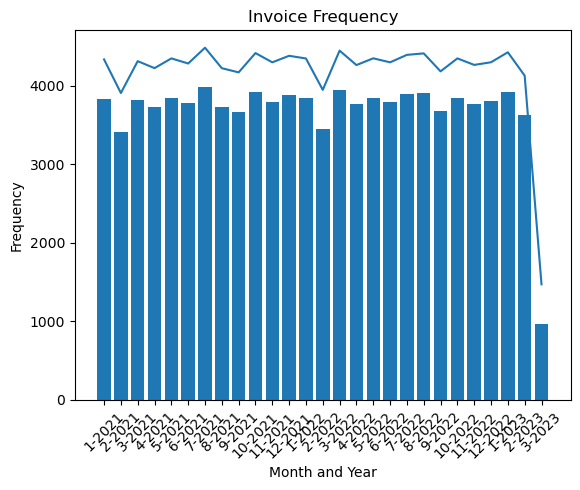

In [32]:
import matplotlib.pyplot as plt 

df_csv["invoice_date"]=pd.to_datetime(df_csv["invoice_date"])
df_csv["month"]=df_csv["invoice_date"].dt.month
df_csv["year"]=df_csv["invoice_date"].dt.year
invoice_frequency=df_csv.groupby(["year","month"]).size()
invoice_frequency_df= invoice_frequency.reset_index(name="Counts")

plt.bar(invoice_frequency_df.index, invoice_frequency_df["Counts"])
plt.plot(invoice_frequency_df.index, invoice_frequency_df["Counts"]+500)
x_labels=invoice_frequency_df.apply(lambda x: f"{x['month']}-{x['year']}", axis=1)
plt.xticks(invoice_frequency_df.index, x_labels, rotation=45)
plt.xlabel("Month and Year")
plt.ylabel("Frequency")
plt.title("Invoice Frequency")
plt.show()


There are months in which the frequency of invoices drops or rises as compared to the previous month for all years. 
<ul>
<li> Drop: February, April, June, September, November </li>
<li> Rise: March, May, July, October, December </li> 
</ul>
Overall, the frequency of invoices each month ranges between 3000-4000. 

##### clothes per month 

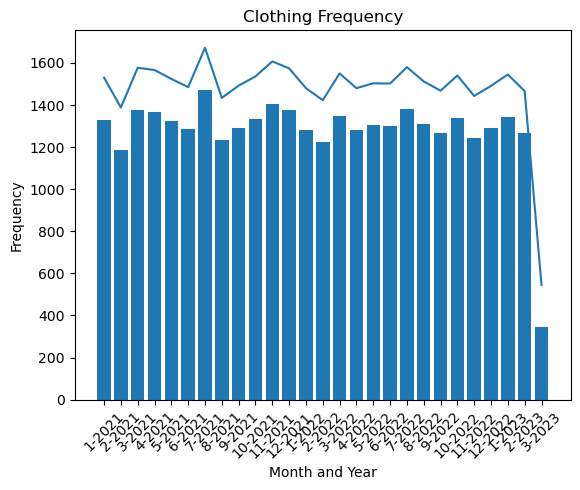

In [35]:
clothes_df=df_csv[df_csv["category"]=="Clothing"]
clothes_frequency=clothes_df.groupby(["year",'month']).size()
clothes_frequency_df= clothes_frequency.reset_index(name="Counts")

plt.bar(clothes_frequency_df.index, clothes_frequency_df["Counts"])
plt.plot(clothes_frequency_df.index, clothes_frequency_df["Counts"]+200)
x_labels=clothes_frequency_df.apply(lambda x: f"{x['month']}-{x['year']}", axis=1)
plt.xticks(clothes_frequency_df.index, x_labels, rotation=45)
plt.xlabel("Month and Year")
plt.ylabel("Frequency")
plt.title("Clothing Frequency")
plt.show()

There is no clear pattern in the trends for clothing purchases. However, you may notice a consistent slight decrease in May and August as well as a slight increase in September and November of each year. Overall, the frequency for clothing purchases ranges from around 1200-1500 per month. 

##### shoes frequency

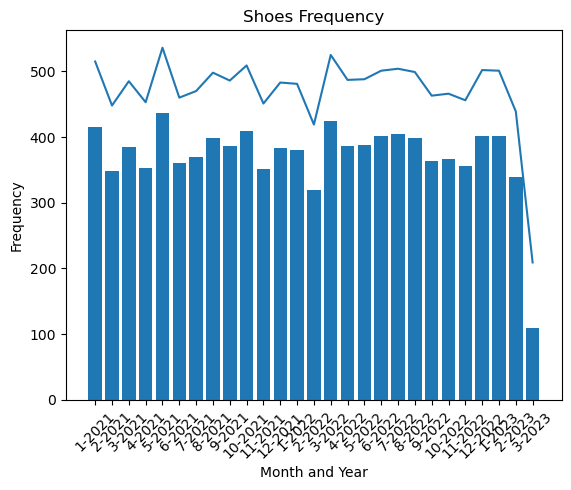

In [37]:
shoes_df=df_csv[df_csv["category"]=="Shoes"]
shoes_frequency=shoes_df.groupby(["year",'month']).size()
shoes_frequency_df= shoes_frequency.reset_index(name="Counts")

plt.bar(shoes_frequency_df.index, shoes_frequency_df["Counts"])
plt.plot(shoes_frequency_df.index, shoes_frequency_df["Counts"]+100)
x_labels=shoes_frequency_df.apply(lambda x: f"{x['month']}-{x['year']}", axis=1)
plt.xticks(shoes_frequency_df.index, x_labels, rotation=45)
plt.xlabel("Month and Year")
plt.ylabel("Frequency")
plt.title("Shoes Frequency")
plt.show()

There are months in which the frequency of shoe sales consistently drops, rises, or slight changes only as compared to the previous month for all years. 
<ul>
<li> Drop: February, April, September </li>
<li> Rise: March, December </li> 
<li> Slight changes only: August, January </li>
</ul>
Overall, the frequency of shoe sales each month ranges between 300-450. 

##### books frequency

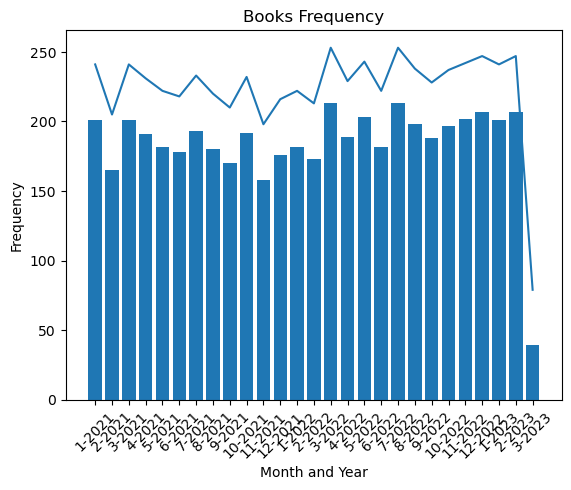

In [41]:
books_df=df_csv[df_csv["category"]=="Books"]
books_frequency=books_df.groupby(["year",'month']).size()
books_frequency_df= books_frequency.reset_index(name="Counts")

plt.bar(books_frequency_df.index, books_frequency_df["Counts"])
plt.plot(books_frequency_df.index, books_frequency_df["Counts"]+40)
x_labels=books_frequency_df.apply(lambda x: f"{x['month']}-{x['year']}", axis=1)
plt.xticks(books_frequency_df.index, x_labels, rotation=45)
plt.xlabel("Month and Year")
plt.ylabel("Frequency")
plt.title("Books Frequency")
plt.show()

There are months in which the frequency of book sales consistently drops or rises only as compared to the previous month for all years. 
<ul>
<li> Drop: April, June, August, September </li>
<li> Rise: March, July, October December </li> 
</ul>
Overall, the frequency of book sales each month ranges between 150-225. 

##### cosmetics frequency 

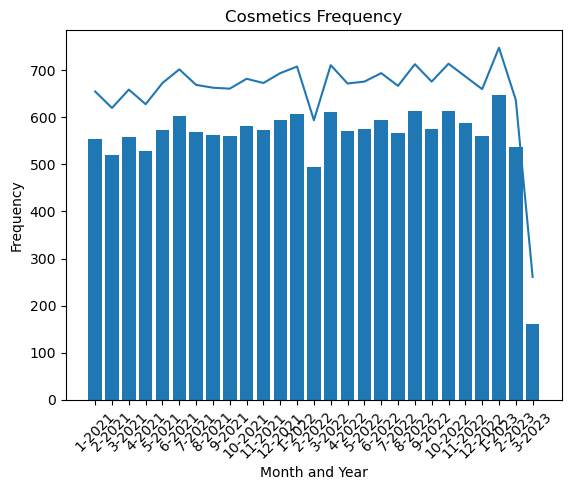

In [42]:
cosmetics_df=df_csv[df_csv["category"]=="Cosmetics"]
cosmetics_frequency=cosmetics_df.groupby(["year",'month']).size()
cosmetics_frequency_df= cosmetics_frequency.reset_index(name="Counts")

plt.bar(cosmetics_frequency_df.index, cosmetics_frequency_df["Counts"])
plt.plot(cosmetics_frequency_df.index, cosmetics_frequency_df["Counts"]+100)
x_labels=cosmetics_frequency_df.apply(lambda x: f"{x['month']}-{x['year']}", axis=1)
plt.xticks(cosmetics_frequency_df.index, x_labels, rotation=45)
plt.xlabel("Month and Year")
plt.ylabel("Frequency")
plt.title("Cosmetics Frequency")
plt.show()

There are months in which the frequency of cosmetic sales consistently drops, rises, or slight changes only as compared to the previous month for all years. 
<ul>
<li> Drop: February, April, July </li>
<li> Rise: Janary, March, June, October </li> 
<li> Slight changes only: November</li>
</ul>
Overall, the frequency of cosmetic sales each month ranges between 500-650. 

##### Food & Beverage Frequency

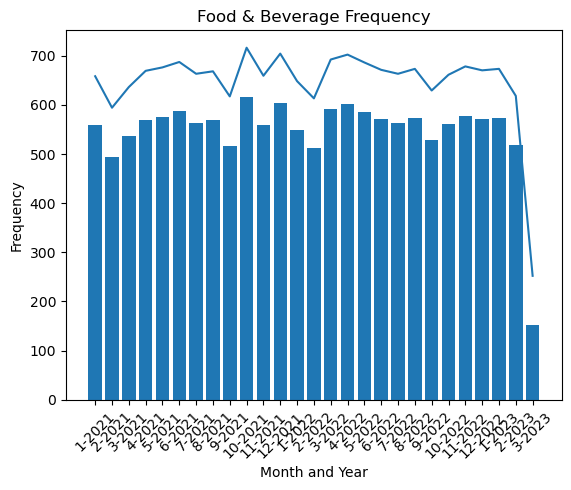

In [43]:
food_df=df_csv[df_csv["category"]=="Food & Beverage"]
food_frequency=food_df.groupby(["year",'month']).size()
food_frequency_df=food_frequency.reset_index(name="Counts")

plt.bar(food_frequency_df.index, food_frequency_df["Counts"])
plt.plot(food_frequency_df.index, food_frequency_df["Counts"]+100)
x_labels=food_frequency_df.apply(lambda x: f"{x['month']}-{x['year']}", axis=1)
plt.xticks(food_frequency_df.index, x_labels, rotation=45)
plt.xlabel("Month and Year")
plt.ylabel("Frequency")
plt.title("Food & Beverage Frequency")
plt.show()

There are months in which the frequency of food & beverage sales consistently drops, rises, or slight changes only as compared to the previous month for all years. 
<ul>
<li> Drop: February, August, October </li>
<li> Rise: March, April, May, November </li> 
<li> Slight changes only: September </li>
</ul>
Overall, the frequency of food & beverage sales each month ranges between 500-650. 

##### toys frequency 

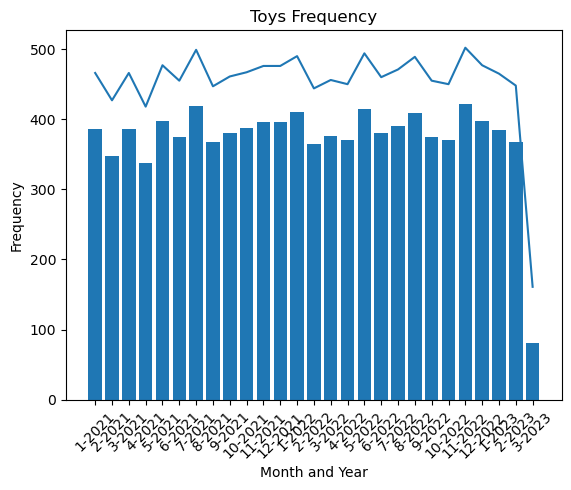

In [45]:
toys_df=df_csv[df_csv["category"]=="Toys"]
toys_frequency=toys_df.groupby(["year",'month']).size()
toys_frequency_df=toys_frequency.reset_index(name="Counts")

plt.bar(toys_frequency_df.index, toys_frequency_df["Counts"])
plt.plot(toys_frequency_df.index, toys_frequency_df["Counts"]+80)
x_labels=toys_frequency_df.apply(lambda x: f"{x['month']}-{x['year']}", axis=1)
plt.xticks(toys_frequency_df.index, x_labels, rotation=45)
plt.xlabel("Month and Year")
plt.ylabel("Frequency")
plt.title("Toys Frequency")
plt.show()

There are months in which the frequency of toy sales consistently drops, rises, or slight changes only as compared to the previous month for all years. 
<ul>
<li> Drop: February, April, June </li>
<li> Rise: March, May, July </li> 
<li> Slight changes only: October </li>
</ul>
Overall, the frequency of toy sales each month ranges between 300-450. 

##### technology frequency 

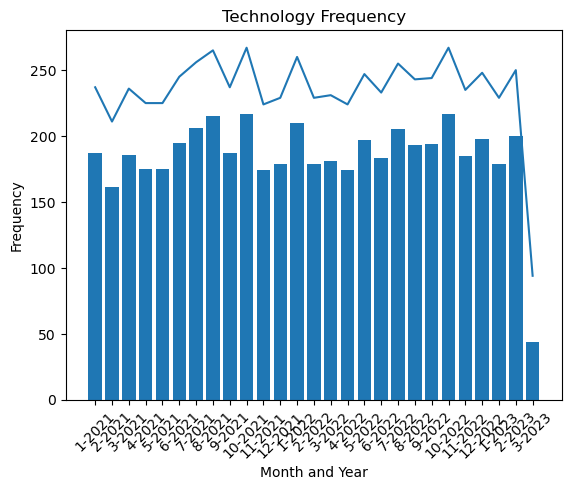

In [47]:
tech_df=df_csv[df_csv["category"]=="Technology"]
tech_frequency=tech_df.groupby(["year",'month']).size()
tech_frequency_df=tech_frequency.reset_index(name="Counts")

plt.bar(tech_frequency_df.index, tech_frequency_df["Counts"])
plt.plot(tech_frequency_df.index, tech_frequency_df["Counts"]+50)
x_labels=tech_frequency_df.apply(lambda x: f"{x['month']}-{x['year']}", axis=1)
plt.xticks(tech_frequency_df.index, x_labels, rotation=45)
plt.xlabel("Month and Year")
plt.ylabel("Frequency")
plt.title("Technology Frequency")
plt.show()

There are months in which the frequency of technology sales consistently drops or rises only as compared to the previous month for all years. 
<ul>
<li> Drop: April, November </li>
<li> Rise: July, October, December </li> 
</ul>
Overall, the frequency of technology sales each month ranges between 150-225. 

##### souvenir frequency 

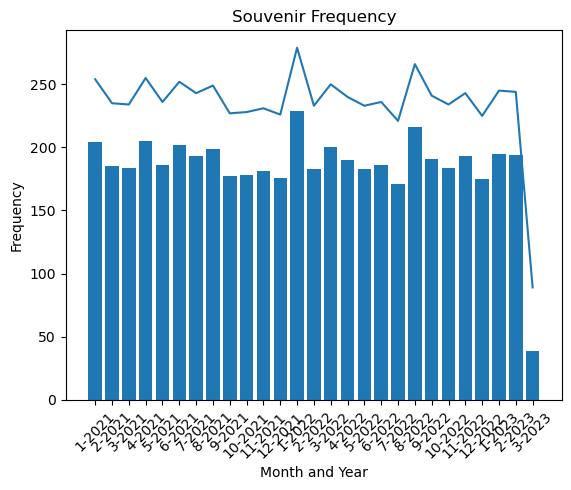

In [49]:
souvenir_df=df_csv[df_csv["category"]=="Souvenir"]
souvenir_frequency=souvenir_df.groupby(["year",'month']).size()
souvenir_frequency_df=souvenir_frequency.reset_index(name="Counts")

plt.bar(souvenir_frequency_df.index, souvenir_frequency_df["Counts"])
plt.plot(souvenir_frequency_df.index, souvenir_frequency_df["Counts"]+50)
x_labels=souvenir_frequency_df.apply(lambda x: f"{x['month']}-{x['year']}", axis=1)
plt.xticks(souvenir_frequency_df.index, x_labels, rotation=45)
plt.xlabel("Month and Year")
plt.ylabel("Frequency")
plt.title("Souvenir Frequency")
plt.show()

There are months in which the frequency of souvenir sales consistently drops or rises as compared to the previous month for all years. 
<ul>
<li> Drop: February, May, July, September, December </li>
<li> Rise: January, June, August </li> 
</ul>
Overall, the frequency of invoices each month ranges between 150-250. 

# Hard

#### 1. Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).

In [8]:
combined_df=pd.merge(df_csv[["category","revenue"]],df_json[["age"]],left_on=df_csv["customer_id"],right_on=df_json["id"])
age_ranges=[10, 19, 29, 39, 49, 59, 69, 79, 89]
age_groups=["10-19","20-29","30-39","40-49","50-59","60-69","70-79","80-89"]
combined_df["age range"]=pd.cut(combined_df["age"],bins=age_ranges,labels=age_groups)
breakdown=combined_df.groupby(["category","age range"])["revenue"].sum().reset_index()
pivot_table=breakdown.pivot_table(values="revenue", index="category", columns="age range")
pivot_table

age range,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89
category,,,,,,,,
Books,12801.75,79461.75,84143.10,87203.40,74962.20,80476.80,54827.85,26664.00
Clothing,1927413.84,10250732.80,11354126.96,11215189.92,10321851.76,10660642.08,7769371.28,4493698.00
Cosmetics,109619.36,605915.32,723544.70,665034.96,587780.96,649990.76,419082.62,254531.60
Food & Beverage,13582.31,73491.96,87246.86,89553.29,72425.04,80976.09,55050.98,31332.93
Shoes,993281.35,5924878.24,7200839.66,7025590.02,5852857.84,5978893.54,4480269.05,2628744.60
Souvenir,12375.15,54943.32,64092.72,66391.80,54943.32,55025.43,38673.81,23718.06
Technology,1129800.00,5261550.00,6159300.00,5954550.00,4435200.00,5471550.00,3638250.00,1946700.00
Toys,60426.24,385100.80,420582.40,390906.88,345067.52,363955.20,273244.16,153932.80
